# **Deep Learning Frameworks**

A deep learning framework allows researchers and developers to achieve the state-of-art compactly and robustly. It helps in training and testing the model using APIs. These provide high-level performance and better management of dependencies.

## **1. Tensorflow**

Developed by Google Brain, Tensorflow is by far, one of the most used deep learning frameworks. Tensorflow provided a wide range of APIs(application programming language) from preprocessing to the modelling of data. It is written in Python, C++ and CUDA. Runs on almost all platforms – Linux, Windows, macOS, iOS and Android. For Android and iOS, Tensorflow provides the TensorflowLite version. For deployment, Tensorflow has powerful clustering support. Tensorflow can be used with CPUs, GPUs and TPUs as well. 

## **2. PyTorch**

Developed by Facebook’s AI Research Lab, PyTorch is another widely used deep learning framework mainly for its Python interface. PyTorch is built on top of the Torch library. PyTorch has similarities with Tensorflow and thus in major competition with it. PyTorch was mainly developed for research and production deployment purpose. Compatible with Linux, Windows, macOS, Android and iOS. Using TorchServe, PyTorch faster speed and ease of access to deploy models.TorchScript provides flexibility in the transition of graph mode functionalities. Distributed training allows PyTorch to provide optimisation in models. Active development community for computer vision and NLP to reinforcement learning techniques. Some milestones by PyTorch- HuggingFaces Transformers, PyTorch Lightening, Tesla Autopilot, Uber Pyro, Catalyst.

## **3. Caffe**

Developed by the University of California, Berkeley, Caffe supports various architectures for image segmentation and classification. Caffe is written in C++. Compatible with Linux, Windows, macOS. Works on CPUs but better performance with GPU acceleration. Caffe is preferred for its speed and industry deployment. Can process up to 60million images with NVIDIA GPU. 

## **4. MXNet**

Developed by Apache Software Foundation, MXNet is an open-source deep learning framework built for high scalability and support by various programming languages. MXNet is written in multiple languages – C++, Python, Java, Scala, Julia, R, Javascript, Perl, Go and Wolfram Language. It is known for its fast model training. Compatible with Windows, macOS, Linux. Can run on smart devices as its lightweight and memory efficient. By its hybrid nature through distributed training MXNet allows combined symbolic and imperative operations, making it efficient, flexible and portable.

You can read more about [Deep Learning Frameworks](https://analyticsindiamag.com/deep-learning-frameworks/)

# **Getting Started with Deep Learning with Tensorflow Keras**

Let’s try to understand the implementation of a neural layer with a code example

## **Import necessary libraries and modules.**

In [ ]:
!python -m pip install pip --upgrade --user -q
!python -m pip install numpy pandas seaborn matplotlib scipy sklearn statsmodels keras tensorflow --user -q

In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

## **Dataset**

We can proceed our discussion with a regression problem having structured data. This example is loaded from Google Colab’s in-built datasets. Readers may opt for their own data.

## **Load the Dataset**

We use `california_housing_train.csv` for training and `california_housing_test`.csv for validation. Load the data using the following commands.

In [ ]:
train = pd.read_csv('california_housing_train.csv')
test = pd.read_csv('california_housing_test.csv')
train.head() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


How many examples are there in the train and validation sets?

In [ ]:
train.shape, test.shape

((17000, 9), (3000, 9))

There are 17000 training examples and 3000 validation examples. There are nine columns in total, including the target column. Let’s check the usability of the raw train data.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


Each feature is of `float64` data type and there are no missing values in the train data. The data is clean and can be used as such.

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


Similarly, validation data has no missing values. Let’s split the features and target.

## **Split the data into independent and dependent variables for both train and test set**

In [ ]:
# train features and target
X_train = train.copy()
y_train = X_train.pop('median_house_value')
# test features and target
X_test = test.copy()
y_test = X_test.pop('median_house_value') 

## **Define the layers**

Let’s define a Keras dense layer with 3 units (or neurons) and a relu activation. Since there are 8 features in the train data, input_shape is [8].  

In [ ]:
# dense layer 3 units; relu; 8 input features
layer_1 = keras.layers.Dense(3, activation='relu', input_shape=[8]) 

This layer can be applied to data without training. However, the weights will be randomly initialized during its call.

In [ ]:
# prepare a single row of data
example = np.array(X_train.iloc[:1,:])
example.shape 

(1, 8)

Example data is ready and has the correct input shape as the layer expects. 

In [ ]:
print(layer_1(example))

tf.Tensor([[  0.       0.     680.7681]], shape=(1, 3), dtype=float32)


Output has three entries each corresponding to the three neuron units. The first value is a positive number, whereas the next two values are zeros. This may be because of the ReLU activation that forces negative numbers to zero.

Let’s load the neural layer’s weights. 

In [ ]:
layer_1.weights

[<tf.Variable 'dense/kernel:0' shape=(8, 3) dtype=float32, numpy=
 array([[ 0.6245797 , -0.59686875,  0.08337265],
        [-0.6837245 ,  0.28124613, -0.23969704],
        [-0.38323033,  0.14373493, -0.24729049],
        [-0.7025763 , -0.3519679 ,  0.21357328],
        [-0.4390019 , -0.5860697 ,  0.3290804 ],
        [-0.41210315,  0.69112045, -0.61601436],
        [-0.20141715,  0.1463952 , -0.61945164],
        [ 0.21419644,  0.1856376 , -0.6324778 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

The top array refers to weights and the bottom array refers to bias. 8 inputs each to 3 units cause 8×3 weights and three units cause 3 biases. These values are purely random and will be updated during training.

A neural layer without ReLU activation may have negative outputs. Let’s define another layer without any activation function.

In [ ]:
# dense layer 3 units; no activation; 8 input features
layer_2 = keras.layers.Dense(3, input_shape=[8])
print(layer_2(example)) 

tf.Tensor([[2490.4106   158.51665 4191.5845 ]], shape=(1, 3), dtype=float32)


As expected the output array contains one positive and two negative values. (This may vary, as the weights are purely random)

In [ ]:
layer_2.weights

[<tf.Variable 'dense_1/kernel:0' shape=(8, 3) dtype=float32, numpy=
 array([[-0.00340933,  0.00668359,  0.11231101],
        [ 0.60396177,  0.12467122,  0.20606595],
        [ 0.27252632,  0.08011234, -0.5760157 ],
        [ 0.40149444,  0.2416808 ,  0.7361695 ],
        [-0.10488784, -0.4405736 ,  0.00252134],
        [ 0.53222746, -0.5977638 , -0.14960325],
        [-0.41159603, -0.06421703,  0.4749295 ],
        [ 0.48893732, -0.13362098, -0.6157948 ]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

It is clear that the presence of an activation function has no role in determining the number of parameters.

## **Create Neural Network**

A neural network is a stack of more than one neural layer. By tradition, a neural network is termed a deep neural network if it is composed of more than or equal to 3 neural layers. The first layer that takes input from data is called the input layer, and the last layer that gives the required output is called the output layer. The remaining layers are generally called the hidden layers. They are called so because the outputs of hidden layers are not explicit.

Let’s build a neural network with 4 layers, each with 256 units and ReLU activation functions. The final layer gives a single continuous output (regression problem). Hence, it must have a single unit without any activation.

In [ ]:
regressor = keras.Sequential([
                            # input layer
                            keras.layers.Dense(512, activation='relu', input_shape=[8]),
                            # 3 hidden layers
                            keras.layers.Dense(512, activation='relu'),
                            keras.layers.Dense(512, activation='relu'),
                            keras.layers.Dense(512, activation='relu'),
                            # output layer
                            keras.layers.Dense(1)
]) 

The number of parameters in each neural layer can be calculated using the code,

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               4608      
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 513       
Total params: 793,089
Trainable params: 793,089
Non-trainable params: 0
_________________________________________________________________


Number of parameters in each layer can be manually verified by considering the number of units in each layer and the number of inputs they receive.

The neural network is built and is ready for training. It is custom to apply data to an untrained model to check for any shape compatibility issues.

In [ ]:
# test the untrained model
regressor.predict(example) 

array([[36.948296]], dtype=float32)

## **Training A Neural Network**

Training is the process of updating weights iteratively so that the model can predict the output with minimal error. This needs two important functions: a [loss function](https://analyticsindiamag.com/loss-functions-in-deep-learning-an-overview/) and [an optimizer](https://analyticsindiamag.com/guide-to-the-latest-adabelief-optimizer-for-machine-deep-learning/). A loss function determines the deviation of output from the ground truth value. An optimizer determines how to update the weights to reduce the loss in the next iteration (or for the next batch). The famous loss functions used in regression problems are mean absolute error (MAE) and mean squared error (MSE). The famous optimizers in deep learning are [stochastic gradient descent (SGD)](https://analyticsindiamag.com/how-stochastic-gradient-descent-is-solving-optimisation-problems-in-deep-learning/) and its variants such as Adam and RMSProp.

Let’s start training by implementing an MAE loss function and an Adam optimizer.

In [ ]:
regressor.compile(loss='mae', optimizer='adam')

It is a good habit to normalize or scale the input data before feeding it to a neural network in order to have a unified scale.

In [ ]:
from sklearn.preprocessing  import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

The neural network model is to be trained with batches of data (as SGD expects it). Updating weights is performed after each batch of data. The batch size should be high enough to represent the whole dataset. Here, we use a batch size of 256 and train the model for 100 epochs.

In [ ]:
history = regressor.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    batch_size=256,
                    epochs=100) 

Epoch 1/100
67/67 [==============================] - 3s 38ms/step - loss: 197924.2909 - val_loss: 96826.1562
Epoch 2/100
67/67 [==============================] - 2s 33ms/step - loss: 80737.9404 - val_loss: 58220.4844
Epoch 3/100
67/67 [==============================] - 2s 34ms/step - loss: 56772.9230 - val_loss: 50020.6992
Epoch 4/100
67/67 [==============================] - 2s 34ms/step - loss: 48916.2605 - val_loss: 47104.2734
Epoch 5/100
67/67 [==============================] - 2s 34ms/step - loss: 47432.7490 - val_loss: 46423.1719
Epoch 6/100
67/67 [==============================] - 2s 34ms/step - loss: 45962.3018 - val_loss: 45776.6719
Epoch 7/100
67/67 [==============================] - 2s 34ms/step - loss: 45891.5850 - val_loss: 45303.2734
Epoch 8/100
67/67 [==============================] - 2s 34ms/step - loss: 44802.8418 - val_loss: 44703.7617
Epoch 9/100
67/67 [==============================] - 2s 33ms/step - loss: 44293.3163 - val_loss: 44341.3984
Epoch 10/100
67/67 [=======

There are 67 batches of training data in the above training. ‘loss’ refers to the training loss, and ‘val_loss’ refers to the validation loss. Each epoch has taken 2 seconds approximately. The training performance can be clearly understood with the help of training history.

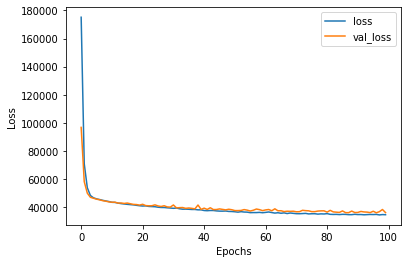

In [ ]:
hist = pd.DataFrame(history.history)
hist.plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show() 

For better visual clarity, plot the loss values after the fifth epoch.

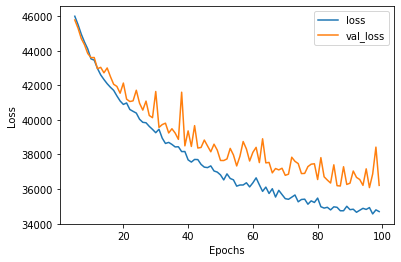

In [ ]:
hist.iloc[5:].plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show() 

Visualizations are always great in communication. Here, the loss keeps on going down even till the 100th epoch. It suggests that the neural network model should be trained for more epochs as long as there is some fall in loss. Further, the validation loss is remarkably higher than the training loss for every epoch after the 10th epoch. It suggests that the model may overfit the training data, and approaches such as [dropout](https://analyticsindiamag.com/everything-you-should-know-about-dropouts-and-batchnormalization-in-cnn/) and [batch normalization](https://analyticsindiamag.com/hands-on-guide-to-implement-batch-normalization-in-deep-learning-models/) have to be attempted. It should be noted that if batch normalization is performed inside the model, any scaling or normalizing attempts on raw data must be given up.

# **Related Articles --**

> * [Deep Learning Frameworks](https://analyticsindiamag.com/deep-learning-frameworks/)
> * [Types of Activation Functions](https://analyticsindiamag.com/most-common-activation-functions-in-neural-networks-and-rationale-behind-it/)
> * [Maths for Deep Learning](https://analyticsindiamag.com/beginners-guide-neural-network-math-python/)
> * [Deep Learning Using Tensorflow Keras](https://analyticsindiamag.com/deep-learning-using-tensorflow-keras/)